<a href="https://colab.research.google.com/github/thhelen/-Predictive-Modeling-for-State-Fragility-Assessment/blob/main/time_series_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [22]:
df = pd.read_csv('/content/combined_train_clean.csv')

df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Stability'] = df['Total'].apply(lambda x : 1 if x > 80 else (-1 if x < 40 else 0))
features = ['C1: Security Apparatus', 'C2: Factionalized Elites',
       'C3: Group Grievance', 'E1: Economy', 'E2: Economic Inequality',
       'E3: Human Flight and Brain Drain', 'P1: State Legitimacy',
       'P2: Public Services', 'P3: Human Rights', 'S1: Demographic Pressures',
       'S2: Refugees and IDPs', 'X1: External Intervention']
label = 'Stability'
df.head()

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Stability
0,0,Sudan,2006-01-01,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN,1
1,1,Congo Democratic Republic,2006-01-01,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN,1
2,2,Cote d'Ivoire,2006-01-01,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN,1
3,3,Iraq,2006-01-01,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN,1
4,4,Zimbabwe,2006-01-01,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN,1


In [23]:
continent_mapping = {
    'Africa': [
        'Nigeria','Congo Democratic Republic',"Cote d'Ivoire", 'Ethiopia','Guinea Bissau', 'Egypt', 'DR Congo', 'Tanzania',
        'South Africa', 'Kenya', 'Uganda', 'Sudan', 'Algeria',
        'Morocco', 'Angola', 'Ghana', 'Mozambique', 'Madagascar',
        'Côte d\'Ivoire', 'Cameroon', 'Niger', 'Mali', 'Burkina Faso',
        'Malawi', 'Zambia', 'Chad', 'Somalia', 'Senegal',
        'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi',
        'Tunisia', 'South Sudan', 'Togo', 'Sierra Leone', 'Libya',
        'Congo', 'Central African Republic', 'Liberia', 'Mauritania', 'Eritrea',
        'Gambia', 'Botswana', 'Namibia', 'Gabon', 'Lesotho',
        'Guinea-Bissau', 'Equatorial Guinea', 'Mauritius', 'Eswatini', 'Djibouti',
        'Comoros', 'Cabo Verde', 'Sao Tome & Principe', 'Seychelles'
    ],'Asia': [
        'India', 'China', 'Indonesia', 'Pakistan', 'Bangladesh',
        'Japan', 'Philippines', 'Vietnam', 'Iran', 'Turkey',
        'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan',
        'Saudi Arabia', 'Uzbekistan', 'Yemen', 'Malaysia', 'Nepal',
        'North Korea', 'Syria', 'Sri Lanka', 'Kazakhstan', 'Cambodia',
        'Jordan', 'Azerbaijan', 'Tajikistan', 'United Arab Emirates', 'Israel',
        'Laos', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'State of Palestine',
        'Lebanon', 'Oman', 'Kuwait', 'Georgia', 'Mongolia',
        'Armenia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus',
        'Bhutan', 'Maldives', 'Brunei'
    ],'Europe': [
        'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
        'Spain', 'Poland', 'Ukraine', 'Romania', 'Netherlands',
        'Belgium', 'Sweden', 'Czech Republic (Czechia)', 'Greece', 'Portugal',
        'Hungary', 'Belarus', 'Austria', 'Switzerland', 'Serbia',
        'Bulgaria', 'Denmark', 'Slovakia', 'Finland', 'Norway',
        'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania',
        'Lithuania', 'Slovenia', 'North Macedonia', 'Latvia', 'Estonia',
        'Luxembourg', 'Montenegro', 'Malta', 'Iceland', 'Andorra',
        'Liechtenstein', 'Monaco', 'San Marino', 'Holy See'
    ],'Oceania': [
        'Australia', 'Papua New Guinea', 'New Zealand', 'Fiji',
        'Solomon Islands', 'Micronesia', 'Vanuatu', 'Samoa',
        'Kiribati', 'Tonga', 'Marshall Islands', 'Palau',
        'Nauru', 'Tuvalu'
    ],'North America': [
        'United States', 'Mexico', 'Canada', 'Guatemala', 'Haiti',
        'Dominican Republic', 'Cuba', 'Honduras', 'Nicaragua', 'El Salvador',
        'Costa Rica', 'Panama', 'Puerto Rico', 'Jamaica', 'Trinidad and Tobago',
        'Bahamas', 'Belize', 'Guadeloupe', 'Martinique', 'Barbados',
        'Curaçao', 'Saint Lucia', 'Grenada', 'Aruba', 'Saint Vincent and the Grenadines',
        'United States Virgin Islands', 'Antigua and Barbuda', 'Dominica', 'Cayman Islands', 'Bermuda',
        'Greenland', 'Saint Kitts and Nevis', 'Turks and Caicos Islands', 'Sint Maarten', 'Saint Martin',
        'British Virgin Islands', 'Caribbean Netherlands', 'Anguilla', 'Saint Barthélemy', 'Saint Pierre and Miquelon',
        'Montserrat'
    ],'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
        'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana',
        'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ]}

In [24]:
country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}

df['Continent'] = df['Country'].map(country_to_continent)

In [25]:
# Train-Test Split
train_mask = df['Year'] <= '2020-01-01'
train_df = df[train_mask]
test_df = df[~train_mask]
train_df.head()

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Stability,Continent
0,0,Sudan,2006-01-01,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN,1,Africa
1,1,Congo Democratic Republic,2006-01-01,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN,1,Africa
2,2,Cote d'Ivoire,2006-01-01,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN,1,Africa
3,3,Iraq,2006-01-01,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN,1,Asia
4,4,Zimbabwe,2006-01-01,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN,1,Africa


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99        69
           0       1.00      0.94      0.97       210
           1       0.93      1.00      0.96       144

    accuracy                           0.97       423
   macro avg       0.97      0.98      0.98       423
weighted avg       0.97      0.97      0.97       423



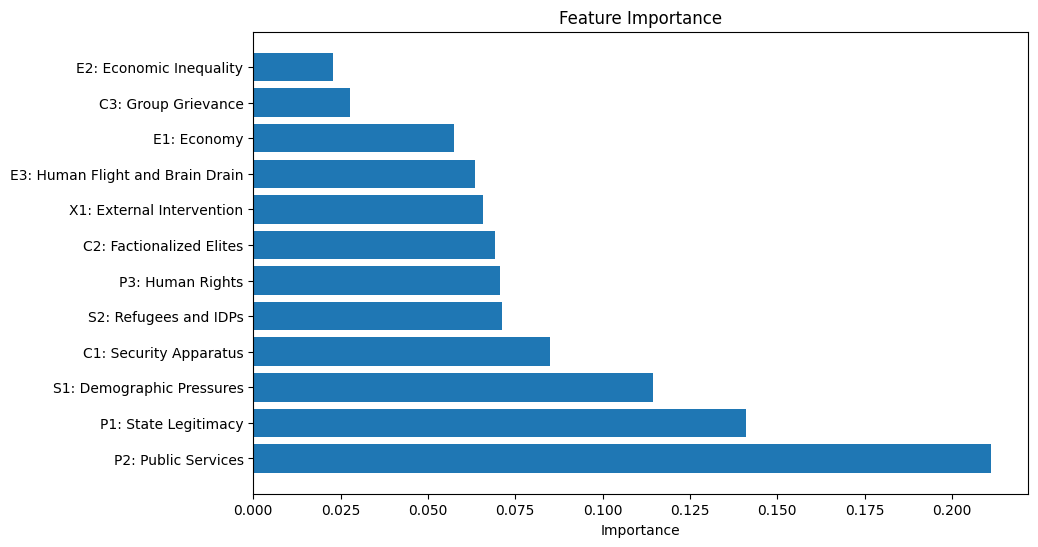

In [26]:
# Model Training
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

# Feature Importance Visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

In [27]:
# Most important features of data
data = df[['C1: Security Apparatus', 'P1: State Legitimacy', 'P2: Public Services', 'S1: Demographic Pressures']]

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='country-selector',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value=['Country A'],
        multi=True,
        style={'width': '50%'}
    ),
    dcc.Graph(id='line-plots')
])

@app.callback(
    Output('line-plots', 'figure'),
    [Input('country-selector', 'value')]
)
def update_line_plots(selected_countries):
    filtered_data = df[df['Country'].isin(selected_countries)]
    fig = make_subplots(rows=2, cols=2, subplot_titles=data.columns)

    for i, column in enumerate(data.columns):
        row = (i // 2) + 1
        col = (i % 2) + 1

        for country in selected_countries:
            trace = go.Scatter(
                x=filtered_data[filtered_data['Country'] == country]['Year'],
                y=filtered_data[filtered_data['Country'] == country][column],
                mode='lines',
                name=country
            )
            fig.add_trace(trace, row=row, col=col)

        fig.update_yaxes(range=[0, 10], row=row, col=col)

    fig.update_layout(
        height=800,
        showlegend=False,
        title_text='Line Plots for Selected Countries Over Years',
        title_x=0.5,
        title_font=dict(size=16),
    )

    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [28]:
df_tran = df[['Country', 'Year', 'Stability', 'Continent']]
df_tran['Year'] = pd.to_datetime(df_tran['Year']).dt.year

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        id='continent-selector',
        options=[{'label': continent, 'value': continent} for continent in df_tran['Continent'].unique()],
        value=df_tran['Continent'].unique()[0],
        style={'width': '50%'}
    ),
    # Heatmap for stability based on continent
    dcc.Graph(id='stability-heatmap')
])
@app.callback(
    Output('stability-heatmap', 'figure'),
    [Input('continent-selector', 'value')]
)

def update_heatmap(selected_continent):

    filtered_stability = df_tran[df_tran['Continent'] == selected_continent]

    random_10_countries = filtered_stability['Country'].unique().tolist()
    if len(random_10_countries) > 10:
        random_10_countries = pd.Series(random_10_countries).sample(10).tolist()

    filtered_stability = df_tran[(df_tran['Continent'] == selected_continent) & (df_tran['Country'].isin(random_10_countries))]
    heatmap_data = go.Heatmap(
        z=filtered_stability.pivot_table(index='Country', columns='Year', values='Stability').values,
        x=sorted(filtered_stability['Year'].unique()),
        y=sorted(filtered_stability['Country'].unique()),
        colorscale='blues',
        colorbar=dict(title='Stability', tickvals=[-1, 0, 1], ticktext=['-1', '0', '1']),
        zmin=-1,
        zmax=1
    )

    fig_heatmap = go.Figure(data=[heatmap_data])
    fig_heatmap.update_layout(
        title=f'Stability Changes Over the Years for {selected_continent} Countries',
        xaxis=dict(title='Year'),
        yaxis=dict(title='Country')
    )

    return fig_heatmap

if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-28-4120382413f9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>